In [3]:
%load_ext autoreload
%autoreload 2

import sys, os, multiprocessing
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import time
import h5py
from tqdm import tqdm
import cv2

from hydra.model.smc import SMC
from hydra.model.shell import Shell
from hydra.model.layer import Layer
from hydra.model.force_encoder_ecto import ForceEncoderEcto
from hydra.model.force_encoder_endo import ForceEncoderEndo
from hydra.model.fluo_encoder import FluoEncoder
from hydra.model import plot
import hydra.model.helper as helper

In [4]:
SPARSITY = 0.001
shell = Shell(Layer(SMC(T=100, dt=0.0002), gip3x=5, gip3y=40),Layer(SMC(T=100, dt=0.0002), gip3x=5, gip3y=40), sparsity=SPARSITY)

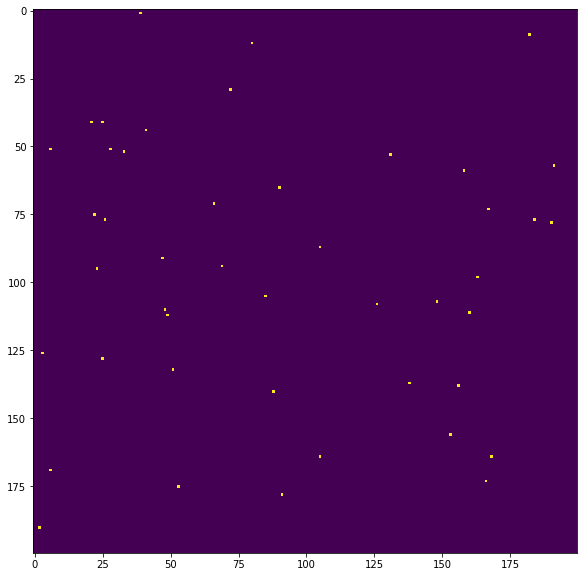

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(shell.cross_layer_pattern.reshape(200, 200))
plt.show()

In [35]:
FILENAME = "2020-07-13-16-35-39-323801"
# METAPATH = "./results/data/meta.txt"

# # Load metadata
# data = pd.read_csv(METAPATH, sep="\s+")
# print(data.Metadata[data.Filename == FILENAME].values[0])

In [36]:
# Read the simulation results
calcium = pd.read_hdf("./results/data/calcium/" + FILENAME + ".h5")
calcium = calcium.values.reshape(len(calcium), 100, 100)

In [37]:
calcium.shape

(15000, 100, 100)

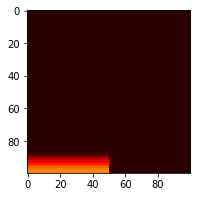

In [38]:
plt.figure(figsize=(20,3))
plt.imshow(np.flip(calcium[1].T, 0), vmin=0, vmax=1, cmap='hot')
plt.show()

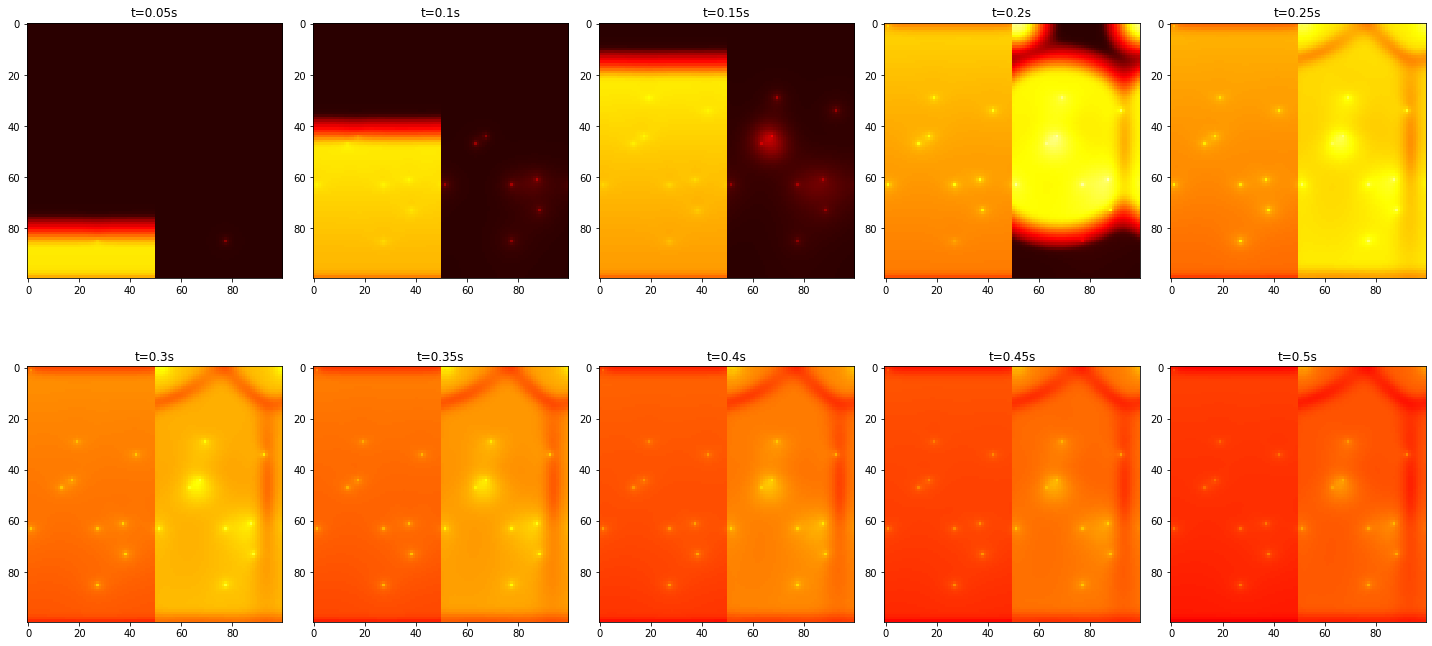

In [39]:
# Plot calcium patterns at specified times
plot.plot_frame_patterns(calcium, list(np.arange(0.05, 0.55, 0.05)), vmin=0, vmax=1, dt=0.02)

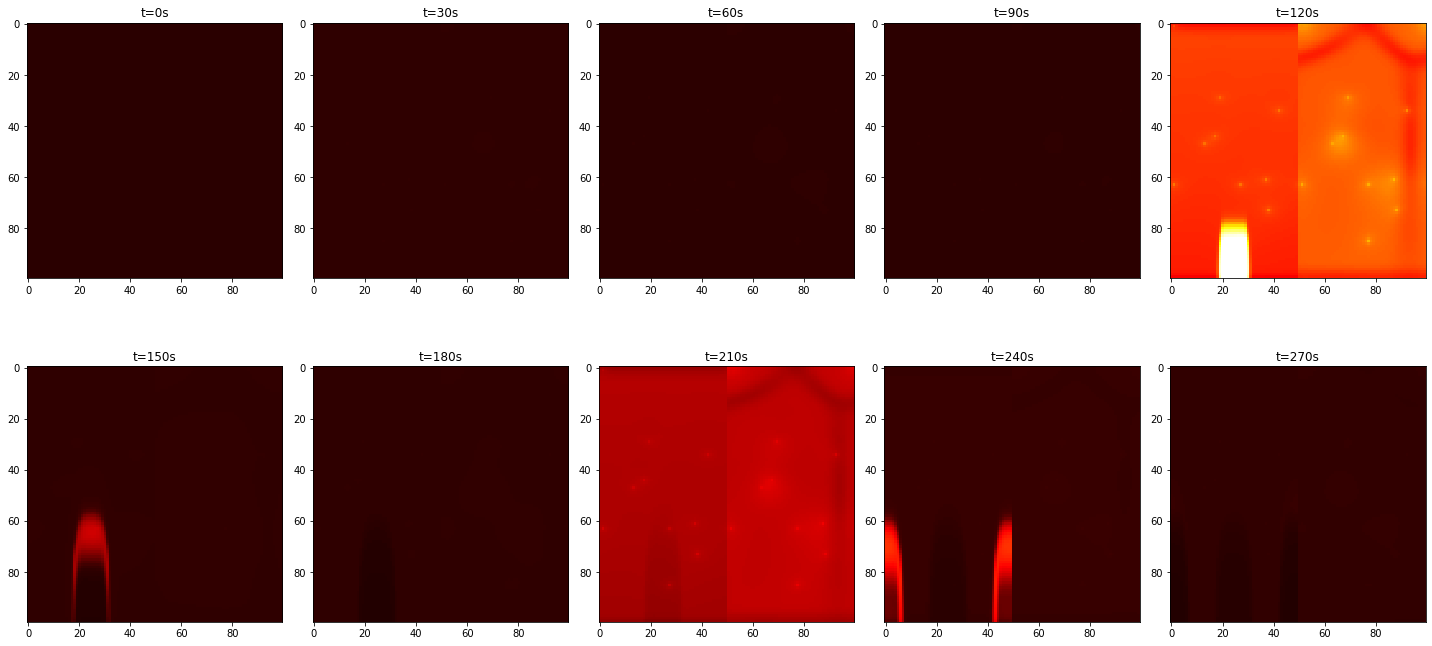

In [40]:
# Plot calcium patterns at specified times
plot.plot_frame_patterns(calcium, list(np.arange(0, 300, 30)), vmin=0, vmax=1, dt=0.02)

In [ ]:
# Save video
data = calcium

NUMX = 100
NUMY = 100
DPI = 50
FPS = 100
SAVEPATH = './results/video/calcium/'

plt.figure(figsize=(NUMX/DPI, NUMY/DPI))

for iframe in tqdm(range(len(data))):

    plt.clf()

    frame = data[iframe]
    # if flip:
    #     frame = np.flip(frame.T, 0)

    plt.imshow(frame.T, cmap='hot', vmin=0, vmax=2)

    plt.axis('off')

    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())

    plt.xlim(0, NUMX)
    plt.ylim(0, NUMY)
    plt.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0, wspace=0)
    plt.margins(0, 0)

    plt.savefig(SAVEPATH + 'frames/img' + str(iframe) + '.jpg', dpi=DPI)

# Save video
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
videoWriter = cv2.VideoWriter(SAVEPATH + '/' + FILENAME + '.avi', fourcc, FPS, (NUMX, NUMY))

for iframe in tqdm(range(len(data))):
    frame = cv2.imread(SAVEPATH + 'frames/img' + str(iframe) + '.jpg')
    videoWriter.write(frame)
videoWriter.release()
cv2.destroyAllWindows()



  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 4/15000 [00:00<07:40, 32.54it/s]

  0%|          | 8/15000 [00:00<07:23, 33.82it/s]

  0%|          | 12/15000 [00:00<07:07, 35.09it/s]

  0%|          | 16/15000 [00:00<07:08, 34.94it/s]

  0%|          | 20/15000 [00:00<07:01, 35.51it/s]

  0%|          | 24/15000 [00:00<06:56, 35.96it/s]

  0%|          | 28/15000 [00:00<08:24, 29.68it/s]

  0%|          | 32/15000 [00:00<08:08, 30.66it/s]

  0%|          | 36/15000 [00:01<07:48, 31.92it/s]

  0%|          | 40/15000 [00:01<07:25, 33.55it/s]

  0%|          | 44/15000 [00:01<07:26, 33.48it/s]

  0%|          | 48/15000 [00:01<07:43, 32.27it/s]

  0%|          | 52/15000 [00:01<07:27, 33.42it/s]

  0%|          | 56/15000 [00:01<07:46, 32.02it/s]

  0%|          | 60/15000 [00:01<07:23, 33.71it/s]

  0%|          | 64/15000 [00:01<07:15, 34.29it/s]

  0%|          | 68/15000 [00:02<07:09, 34.80it/s]

  0%|          | 72/15000 [00:02<07:01, 35.43it/s]

  1%|          | 76/1